In [3]:
# -*- coding: utf-8 -*-
"""
Rejet en distance et en ambiguïté pour QDA
"""

import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score


In [4]:

#%% Chargement de données
X = pd.read_excel("Sujet2.xlsx", sheet_name=0, header=0, index_col=0)
X_C = X.drop(columns=['beta'])

#%% Séparer les données en ensembles d'apprentissage (420 premières lignes) et de test (reste)
X_train = X_C.iloc[:420, 0:5]  # 420 premières lignes pour l'apprentissage
y_train = X_C['phase'][:420]

X_test = X_C.iloc[420:, 0:5]  # Reste pour le test
y_test = X_C['phase'][420:]

#%% Entraîner le modèle QDA sur l'ensemble d'apprentissage
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)


QuadraticDiscriminantAnalysis()

In [ ]:
#%% Prédire sur l'ensemble de test
y_pred = qda.predict(X_test)
y_proba = qda.predict_proba(X_test)

trace=[]
exemple=np.zeros((2,1))

#%% Calcul des distances de Mahalanobis pour chaque point
def mahalanobis_distance(x, mean, cov):
    cov_inv = np.linalg.inv(cov)  # Inverser la matrice de covariance
    diff = x - mean
    dist = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return dist

# Calcul manuel des matrices de covariance et des moyennes pour QDA
classes = qda.classes_
means = qda.means_

# Calcul des covariances pour chaque classe
covariances = []
for i, class_label in enumerate(classes):
    X_class = X_train[y_train == class_label].iloc[:, 0:5]
    covariance = np.cov(X_class, rowvar=False)
    covariances.append(covariance)

# Calcul des distances de Mahalanobis pour chaque point de test
distances = []
for i, row in X_test.iterrows():
    class_distances = []
    for j, class_mean in enumerate(means):
        dist = mahalanobis_distance(row, class_mean, covariances[j])
        class_distances.append(dist)
    distances.append(min(class_distances))  # Distance minimale parmi les classes

#%% Rejet en ambiguïté et en distance
# Définir les seuils
distance_threshold = 10  # Seuil de distance pour le rejet
proba_threshold = 0.7  # Seuil de probabilité pour le rejet en ambiguïté

# Appliquer les rejets sur les prédictions
y_pred_reject = []
for i in range(len(y_pred)):
    # Rejet en distance
    if distances[i] > distance_threshold:
        y_pred_reject.append(-1)
    # Rejet en ambiguïté
    elif max(y_proba[i]) < proba_threshold:
        y_pred_reject.append(-1)
    else:
        y_pred_reject.append(y_pred[i])
    trace.append([exemple[0], exemple[1],y_pred_reject])

#%% Calculer la nouvelle matrice de confusion avec rejet
cm_reject = confusion_matrix(y_test, y_pred_reject, labels=[0, 2, 4, 5, -1]) # -1-> unpredict
print("Matrice de confusion avec rejet (distance et ambiguïté) :")
print(cm_reject)

# Calculer l'accuracy et la balanced accuracy avec rejet
accuracy_reject = accuracy_score(y_test, y_pred_reject)
balanced_acc_reject = balanced_accuracy_score(y_test, y_pred_reject, adjusted=True)
print(f"Accuracy avec rejet : {accuracy_reject:.4f}")
print(f"Balanced Accuracy avec rejet : {balanced_acc_reject:.4f}")


Matrice de confusion avec rejet (distance et ambiguïté) :
[[ 83  15   0   2  21]
 [  6 440   2  10  19]
 [  1  12  79   0   5]
 [ 10   6   0 217  91]
 [  0   0   0   0   0]]
Accuracy avec rejet : 0.8037
Balanced Accuracy avec rejet : 0.6975


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [ ]:
 for i in x:
    for j in y:
        exemple=[i, j]
        #donner le code pour affecter une  classe à exemple
        p0 = densité_proba(m0, co0d, exemple)
        p1 = densité_proba(m1,co1d,exemple)
        p = (prob)*p0+(1-prob)*p1
        P0 = p0*(prob)/p
        P1 = p1*(1-prob)/p
        if p>dist:
            if p0>p1 and P0>certain:
                classe=0
            elif p1>p0 and P1>certain:
                classe = 3
            else:
                classe = 1
        else:
            classe = 2
        

trace=np.asarray(trace)
plt.figure()
plt.scatter(trace[:,0],trace[:,1],c=trace[:,2],marker='.')

plt.scatter(A[:,0],A[:,1],c=A[:,2],marker='o')
plt.show()

Matrice de confusion avec rejet (distance et ambiguïté) :
[[ 58  15   0   0   0  48]
 [  1 396   0   0   0  80]
 [  0   2  74   0   0  21]
 [  3   1   0  14   0 306]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
Accuracy avec rejet : 0.5319
Balanced Accuracy avec rejet : 0.3719


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


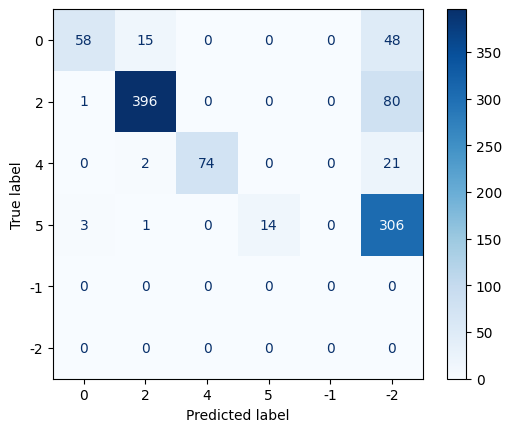

In [17]:
# -*- coding: utf-8 -*-
"""
Rejet en distance et en ambiguïté pour QDA
"""

import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#%% Chargement de données
X = pd.read_excel("Sujet2.xlsx", sheet_name=0, header=0, index_col=0)
X_C = X.drop(columns=['delta'])

#%% Séparer les données en ensembles d'apprentissage (420 premières lignes) et de test (reste)
X_train = X_C.iloc[:420, 0:5]  # 420 premières lignes pour l'apprentissage
y_train = X_C['phase'][:420]

X_test = X_C.iloc[420:, 0:5]  # Reste pour le test
y_test = X_C['phase'][420:]

#%% Entraîner le modèle QDA sur l'ensemble d'apprentissage
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

#%% Prédire sur l'ensemble de test
y_pred = qda.predict(X_test)
y_proba = qda.predict_proba(X_test)

#%% Calcul des distances de Mahalanobis pour chaque point
def mahalanobis_distance(x, mean, cov):
    cov_inv = np.linalg.inv(cov)  # Inverser la matrice de covariance
    diff = x - mean
    dist = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return dist

# Calcul manuel des matrices de covariance et des moyennes pour QDA
classes = qda.classes_
means = qda.means_

# Calcul des covariances pour chaque classe
covariances = []
for i, class_label in enumerate(classes):
    X_class = X_train[y_train == class_label].iloc[:, 0:5]
    covariance = np.cov(X_class, rowvar=False)
    covariances.append(covariance)

# Calcul des distances de Mahalanobis pour chaque point de test
distances = []
for i, row in X_test.iterrows():
    class_distances = []
    for j, class_mean in enumerate(means):
        dist = mahalanobis_distance(row, class_mean, covariances[j])
        class_distances.append(dist)
    distances.append(min(class_distances))  # Distance minimale parmi les classes

#%% Rejet en ambiguïté et en distance
# Définir les seuils
distance_threshold = 10  # Seuil de distance pour le rejet
proba_threshold = 0.95  # Seuil de probabilité pour le rejet en ambiguïté

# Appliquer les rejets sur les prédictions
y_pred_reject = []
for i in range(len(y_pred)):
    # Rejet en distance
    if max(y_proba[i]) < proba_threshold:
        y_pred_reject.append(-2)
    else:
        y_pred_reject.append(y_pred[i])

#%% Calculer la nouvelle matrice de confusion avec rejet
cm_reject = confusion_matrix(y_test, y_pred_reject, labels=[0, 2, 4, 5, -1, -2])
print("Matrice de confusion avec rejet (distance et ambiguïté) :")
print(cm_reject)

# Calculer l'accuracy et la balanced accuracy avec rejet
accuracy_reject = accuracy_score(y_test, y_pred_reject)
balanced_acc_reject = balanced_accuracy_score(y_test, y_pred_reject, adjusted=True)
print(f"Accuracy avec rejet : {accuracy_reject:.4f}")
print(f"Balanced Accuracy avec rejet : {balanced_acc_reject:.4f}")


class_labels = ['0', '2', '4', '5', '-1', '-2']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_reject, display_labels=class_labels)
disp.plot(cmap='Blues',  colorbar=True)

Matrice de confusion avec rejet (distance et ambiguïté) :
[[ 28   4   0   0  48  41]
 [  1 369   0   0  34  73]
 [  0   2  73   0   3  19]
 [  3   0   0  14   2 305]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
Accuracy avec rejet : 0.4750
Balanced Accuracy avec rejet : 0.4502


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


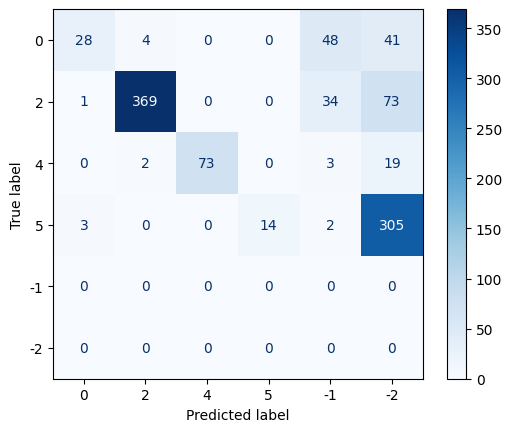

In [18]:
# ...existing code...
# Calcul des covariances pour chaque classe (regularize ligeiramente para evitar singularidade)
covariances = []
for i, class_label in enumerate(classes):
    X_class = X_train[y_train == class_label].iloc[:, 0:5].to_numpy()
    covariance = np.cov(X_class, rowvar=False)
    covariance += np.eye(covariance.shape[0]) * 1e-6   # pequeno regularizador
    covariances.append(covariance)

# Calcul des distances de Mahalanobis pour chaque point d'entraînement (pour definir seuil)
train_distances = []
for _, row in X_train.iterrows():
    row_arr = row.to_numpy()
    class_distances = [mahalanobis_distance(row_arr, means[j], covariances[j]) for j in range(len(classes))]
    train_distances.append(min(class_distances))
train_distances = np.array(train_distances)

# choisir seuil de distance baseado nos dados de treino (ex.: 97ème percentil)
distance_threshold = np.percentile(train_distances, 97)

# Calcul des distances de Mahalanobis pour chaque point de test (aligné avec X_test)
distances = []
for _, row in X_test.iterrows():
    row_arr = row.to_numpy()
    class_distances = [mahalanobis_distance(row_arr, means[j], covariances[j]) for j in range(len(classes))]
    distances.append(min(class_distances))
distances = np.array(distances)

#%% Rejet en ambiguïté et en distance
# Seuil de probabilidade para ambiguidade
proba_threshold = 0.95

y_pred_reject = []
for i in range(len(y_pred)):
    # Rejet por distância (se maior que threshold baseado no treino)
    if distances[i] > distance_threshold:
        y_pred_reject.append(-1)
    # Rejet por ambiguidade (probabilidades baixas)
    elif max(y_proba[i]) < proba_threshold:
        y_pred_reject.append(-2)
    else:
        y_pred_reject.append(y_pred[i])

#%% Matriz de confusão e métricas
cm_reject = confusion_matrix(y_test, y_pred_reject, labels=[0, 2, 4, 5, -1, -2])
print("Matrice de confusion avec rejet (distance et ambiguïté) :")
print(cm_reject)

accuracy_reject = accuracy_score(y_test, y_pred_reject)
balanced_acc_reject = balanced_accuracy_score(y_test, y_pred_reject)
print(f"Accuracy avec rejet : {accuracy_reject:.4f}")
print(f"Balanced Accuracy avec rejet : {balanced_acc_reject:.4f}")

class_labels = ['0', '2', '4', '5', '-1', '-2']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_reject, display_labels=class_labels)
disp.plot(cmap='Blues',  colorbar=True)
# ...existing code...